In [2]:
#establish connection to DB2 database containing URA rental data
import ibm_db
#credentials
#@hidden_cell
dsn_hostname = "dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net" # e.g.: "dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net"
dsn_uid = "dsd71157"        # e.g. "abc12345"
dsn_pwd = "bzxq@6k95c5x3ph8"      # e.g. "7dBZ3wWt9XN6$o0J"

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"            # e.g. "BLUDB"
dsn_port = "50000"                # e.g. "50000" 
dsn_protocol = "TCPIP"            # i.e. "TCPIP"

ImportError: DLL load failed: The network path was not found.

In [3]:
import os
os.environ['PATH'].split(';')

['C:\\Users\\mbijlkh\\Anaconda3',
 'C:\\Users\\mbijlkh\\Anaconda3\\Library\\mingw-w64\\bin',
 'C:\\Users\\mbijlkh\\Anaconda3\\Library\\usr\\bin',
 'C:\\Users\\mbijlkh\\Anaconda3\\Library\\bin',
 'C:\\Users\\mbijlkh\\Anaconda3\\Scripts',
 'C:\\Users\\mbijlkh\\Anaconda3\\bin',
 'C:\\Users\\mbijlkh\\Anaconda3\\condabin',
 'C:\\Users\\mbijlkh\\Anaconda3',
 'C:\\Users\\mbijlkh\\Anaconda3\\Library\\mingw-w64\\bin',
 'C:\\Users\\mbijlkh\\Anaconda3\\Library\\usr\\bin',
 'C:\\Users\\mbijlkh\\Anaconda3\\Library\\bin',
 'C:\\Users\\mbijlkh\\Anaconda3\\Scripts',
 'C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\javapath',
 'C:\\ProgramData\\Oracle\\Java\\javapath',
 'C:\\Windows\\system32',
 'C:\\Windows',
 'C:\\Windows\\System32\\Wbem',
 'C:\\Windows\\System32\\WindowsPowerShell\\v1.0',
 'C:\\Program Files (x86)\\Enterprise Vault\\EVClient',
 'C:\\Program Files (x86)\\Intel\\Intel(R) Management Engine Components\\DAL',
 'C:\\Program Files\\Intel\\Intel(R) Management Engine Components\\DAL',


In [4]:
#Create database connection
#DO NOT MODIFY THIS CELL. Just RUN it with Shift + Enter
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )

Connected to database:  BLUDB as user:  dsd71157 on host:  dashdb-txn-sbox-yp-lon02-04.services.eu-gb.bluemix.net


In [5]:
import pandas as pd
import ibm_db_dbi

pconn = ibm_db_dbi.Connection(conn) #connection for pandas

In [35]:
#query database
#select statement
selectQuery = "select * from URA_RENTAL"

#retrive results into pandas df
try:
    ura_rental = pd.read_sql(selectQuery, pconn)
    print("data retrieved and loaded")
    
except:
    print("unable to retrieve")

data retrieved and loaded


In [36]:
ibm_db.close(conn)
ura_rental.head()

,STREET,X,PROJECT,Y,areaSqft,leaseDate,propertyType,DISTRICT,noOfBedRoom,RENT,areaSqm,PSF
0,ELLIOT ROAD,38883.874192,ELLIOT AT THE EAST COAST,32621.509992,950,18Q1,Non-landed Properties,15,2.0,3000,90-100,3.157895
1,ELLIOT ROAD,38883.874192,ELLIOT AT THE EAST COAST,32621.509992,1750,18Q1,Non-landed Properties,15,4.0,5500,160-170,3.142857
2,ELLIOT ROAD,38883.874192,ELLIOT AT THE EAST COAST,32621.509992,2650,18Q1,Non-landed Properties,15,4.0,6000,240-250,2.264151
3,ELLIOT ROAD,38883.874192,ELLIOT AT THE EAST COAST,32621.509992,2150,18Q1,Non-landed Properties,15,3.0,4700,190-200,2.186047
4,ELLIOT ROAD,38883.874192,ELLIOT AT THE EAST COAST,32621.509992,1650,18Q1,Non-landed Properties,15,2.0,2900,140-150,1.757576


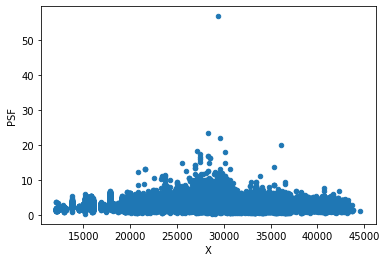

In [10]:
%matplotlib inline


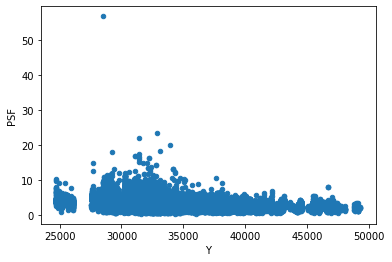

In [11]:
ura_rental.plot.scatter(x = 'Y', y = 'PSF')

In [12]:
#identify outlier
ura_rental[ura_rental.PSF > 50].head()

,STREET,X,PROJECT,Y,areaSqft,leaseDate,propertyType,DISTRICT,noOfBedRoom,RENT,areaSqm,PSF
38254,MISTRI ROAD,29422.076512,LUMIERE,28518.104905,3000,18Q2,Non-landed Properties,2,3.0,170000,>300,56.666667


In [37]:
#remove outlier and NaNs
ura_rental = ura_rental[ura_rental.PSF < 50]
ura_rental.dropna(inplace = True)

In [38]:
#limit dataset to non-landed properties
ura_rental = ura_rental[ura_rental.propertyType == "Non-landed Properties"]

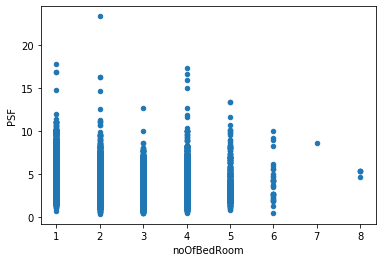

In [39]:
ura_rental.plot.scatter(x = 'noOfBedRoom', y = 'PSF')

In [40]:
#split df into training and testing sets
import numpy as np
msk = np.random.rand(len(ura_rental)) < 0.2
train = ura_rental.iloc[msk]
test = ura_rental.iloc[~msk]

In [41]:
train.head()

,STREET,X,PROJECT,Y,areaSqft,leaseDate,propertyType,DISTRICT,noOfBedRoom,RENT,areaSqm,PSF
3,ELLIOT ROAD,38883.874192,ELLIOT AT THE EAST COAST,32621.509992,2150,18Q1,Non-landed Properties,15,3.0,4700,190-200,2.186047
5,ELLIOT ROAD,38883.874192,ELLIOT AT THE EAST COAST,32621.509992,2150,18Q1,Non-landed Properties,15,3.0,5000,190-200,2.325581
7,ELLIOT ROAD,38883.874192,ELLIOT AT THE EAST COAST,32621.509992,1350,18Q1,Non-landed Properties,15,3.0,4300,120-130,3.185185
11,HILLVIEW AVENUE,19821.989335,MERAWOODS,37573.471112,1350,18Q1,Non-landed Properties,23,3.0,2400,120-130,1.777778
20,LORONG L TELOK KURAU,37046.187609,THE ESPIRA,32729.474433,550,18Q1,Non-landed Properties,15,1.0,1600,50-60,2.909091


In [42]:
test.head()

,STREET,X,PROJECT,Y,areaSqft,leaseDate,propertyType,DISTRICT,noOfBedRoom,RENT,areaSqm,PSF
0,ELLIOT ROAD,38883.874192,ELLIOT AT THE EAST COAST,32621.509992,950,18Q1,Non-landed Properties,15,2.0,3000,90-100,3.157895
1,ELLIOT ROAD,38883.874192,ELLIOT AT THE EAST COAST,32621.509992,1750,18Q1,Non-landed Properties,15,4.0,5500,160-170,3.142857
2,ELLIOT ROAD,38883.874192,ELLIOT AT THE EAST COAST,32621.509992,2650,18Q1,Non-landed Properties,15,4.0,6000,240-250,2.264151
4,ELLIOT ROAD,38883.874192,ELLIOT AT THE EAST COAST,32621.509992,1650,18Q1,Non-landed Properties,15,2.0,2900,140-150,1.757576
6,ELLIOT ROAD,38883.874192,ELLIOT AT THE EAST COAST,32621.509992,2850,18Q1,Non-landed Properties,15,4.0,6800,260-270,2.385965


In [55]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['X','Y','noOfBedRoom']])
y = np.asanyarray(train[['PSF']])
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
#print coefficients
print('Coefficients: ', regr.coef_)

Coefficients:  [[-1.64576560e-05 -1.35511547e-04 -5.07705529e-01]]


In [57]:
y_hat = regr.predict(test[['X','Y','noOfBedRoom']])
x = np.asanyarray(test[['X','Y','noOfBedRoom']])
y = np.asanyarray(test[['PSF']])
print("Residual sum of squares: %.2f"%np.mean((y_hat-y) ** 2))

Residual sum of squares: 0.82


In [58]:
print("Variance score: %.2f"%regr.score(x,y))

Variance score: 0.38


In [59]:
residual = y - y_hat

In [85]:
res_df = pd.DataFrame(data = residual, index = list(range(1,len(residual)+1)))

In [86]:
res_df['pred'] = y_hat

In [92]:
res_df.rename(columns = {0:'res'}, inplace = True)

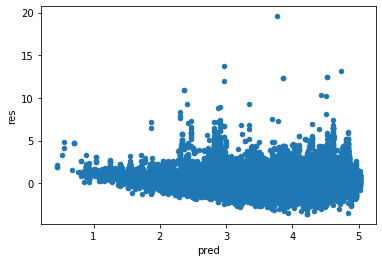

In [94]:
res_df.plot.scatter(x = 'pred', y = 'res')